In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import tensorflow

In [28]:
# Define our example directories and files
train_dir = '../input/sign-language/Sign Gestures/train_frames'
validation_dir = '../input/sign-language/Sign Gestures/test_frames'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1/255.,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(28,28),batch_size=512,shuffle=False,class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,target_size=(28,28),batch_size=64,shuffle=False,class_mode='categorical')


Found 91336 images belonging to 10 classes.
Found 2330 images belonging to 10 classes.


In [7]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 10 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [4]:
export_path = "../input/saved-model-sign-det/9.45"

In [5]:
model = tensorflow.compat.v1.keras.experimental.load_from_saved_model(export_path)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/saving/saved_model_experimental.py:412: UserWarning: `tf.keras.experimental.load_from_saved_model` is deprecatedand will be removed in a future version. Please switch to `tf.keras.models.load_model`.
  warnings.warn('`tf.keras.experimental.load_from_saved_model` is deprecated'


In [6]:
model.save_weights("/kaggle/working/saved_models/1")

In [8]:
model.load_weights("/kaggle/working/saved_models/1")

In [9]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [12]:
history = model.fit(train_generator, validation_data=validation_generator,epochs=10,callbacks = [learning_rate_reduction])

Epoch 1/10
179/179 [==============================] - 554s 3s/step - loss: 0.3554 - accuracy: 0.8824 - val_loss: 0.5224 - val_accuracy: 0.8288
Epoch 2/10
179/179 [==============================] - 575s 3s/step - loss: 0.3490 - accuracy: 0.8838 - val_loss: 0.8799 - val_accuracy: 0.7455
Epoch 3/10
179/179 [==============================] - 570s 3s/step - loss: 0.3445 - accuracy: 0.8848 - val_loss: 1.6881 - val_accuracy: 0.6227

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 4/10
179/179 [==============================] - 584s 3s/step - loss: 0.3400 - accuracy: 0.8874 - val_loss: 0.7023 - val_accuracy: 0.7837
Epoch 5/10
179/179 [==============================] - 570s 3s/step - loss: 0.3415 - accuracy: 0.8866 - val_loss: 0.7953 - val_accuracy: 0.7652

Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 6/10
179/179 [==============================] - 593s 3s/step - loss: 0.3379 - accuracy: 0.8883 - val_loss: 0.5356 - va

In [13]:
import time
t = time.time()

export_path = "/kaggle/working/saved_model/{}".format(int(t))

tensorflow.compat.v1.keras.experimental.export_saved_model(model, export_path)

export_path

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/saving/saved_model_experimental.py:129: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  warnings.warn('`tf.keras.experimental.export_saved_model` is deprecated'
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:492: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.learning_phase_scope` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` ar

'/kaggle/working/saved_model/1614587724'

<a href="./saved_model/1614587724"> Download File </a>

In [14]:
model = tensorflow.compat.v1.keras.experimental.load_from_saved_model(export_path)

In [15]:
model.save_weights("/kaggle/working/saved_models/1")

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import display, Javascript, Image
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import pandas as pd

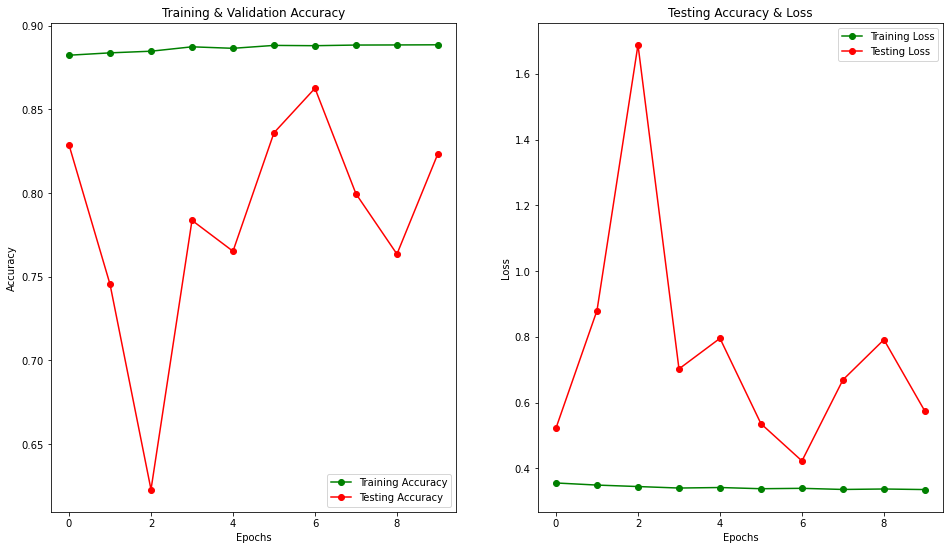

In [17]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [29]:
predictions = np.argmax(model.predict(validation_generator), axis=-1)


predictions

array([7, 0, 0, ..., 9, 9, 9])

In [30]:
validation_labels = validation_generator.classes
validation_labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [31]:
classe = ["Class " + str(i) for i in range(10)]
print(classe)
print(classification_report(validation_labels, predictions, target_names = classe))

['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
              precision    recall  f1-score   support

     Class 0       0.80      0.64      0.71        80
     Class 1       0.82      0.90      0.86       250
     Class 2       0.85      0.74      0.79       250
     Class 3       0.72      0.85      0.78       250
     Class 4       0.93      0.82      0.87       250
     Class 5       0.66      0.90      0.76       250
     Class 6       0.96      0.93      0.94       250
     Class 7       0.89      0.63      0.74       250
     Class 8       0.78      0.83      0.80       250
     Class 9       0.95      0.88      0.92       250

    accuracy                           0.82      2330
   macro avg       0.83      0.81      0.82      2330
weighted avg       0.84      0.82      0.82      2330



<AxesSubplot:>

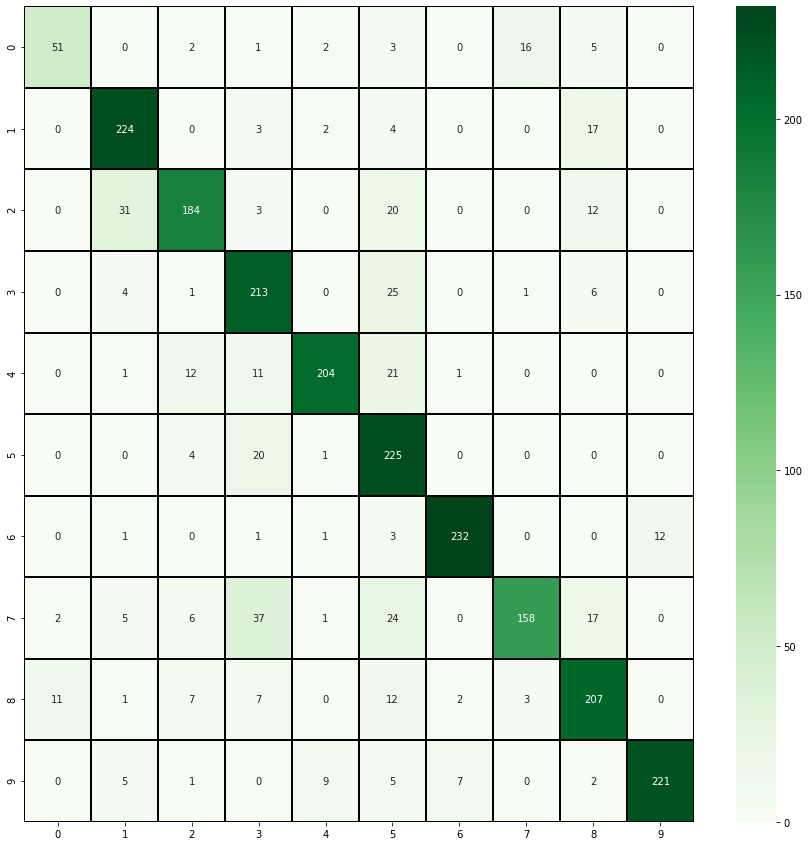

In [32]:
import pandas as pd
cm = confusion_matrix(validation_labels,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(10)] , columns = [i for i in range(10)])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')